## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [4]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()# include code here
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

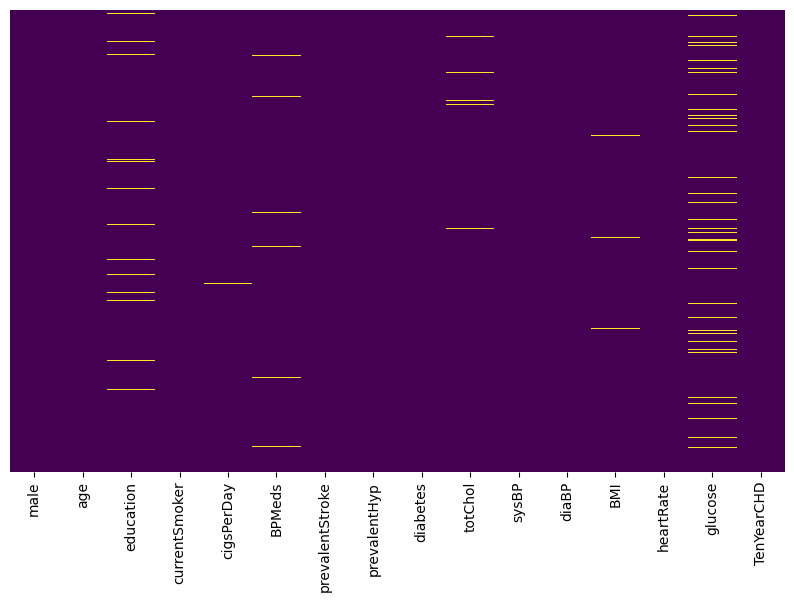

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [6]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [7]:
simpleImputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [8]:
data = df.values

In [9]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [10]:
simpleImputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( ) 

In [11]:
X_transform = simpleImputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [12]:
np.isnan(X).sum()

645

In [13]:
np.isnan(X_transform).sum()

0

### Let's try to visualize the missing values.

<Axes: >

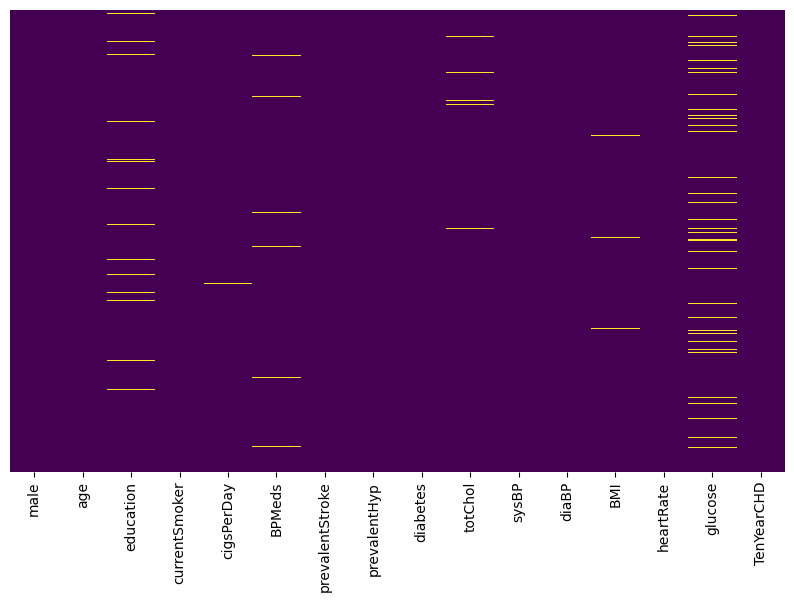

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

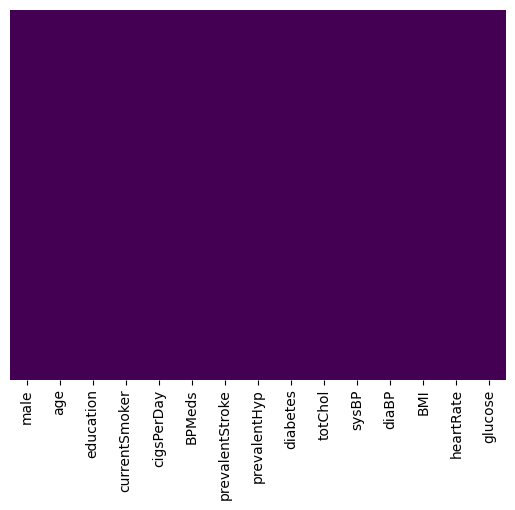

In [15]:
X_transform = pd.DataFrame(X_transform)
X_transform.columns = df.columns[:-1]
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [16]:
df_transform = pd.concat([X_transform, pd.DataFrame(y)],axis='columns').rename(columns = {0:df.columns[-1]})
df_transform

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


<Axes: >

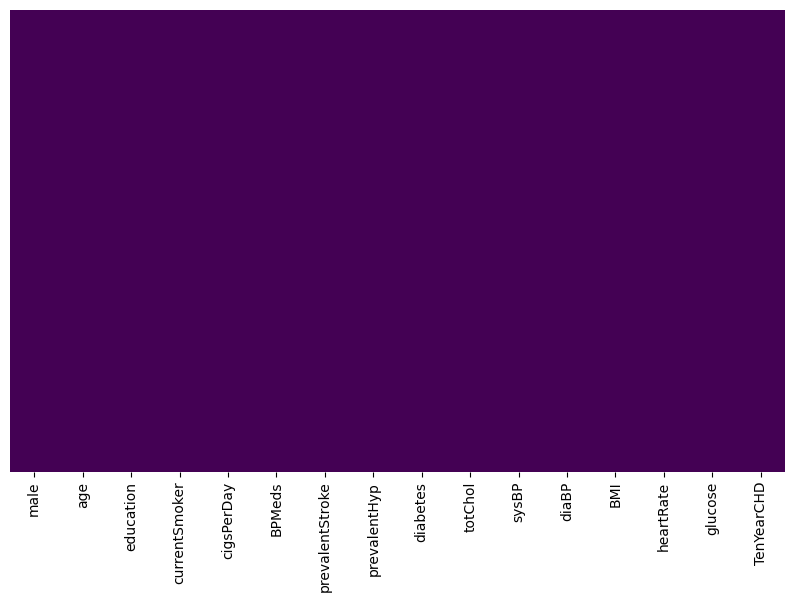

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [18]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

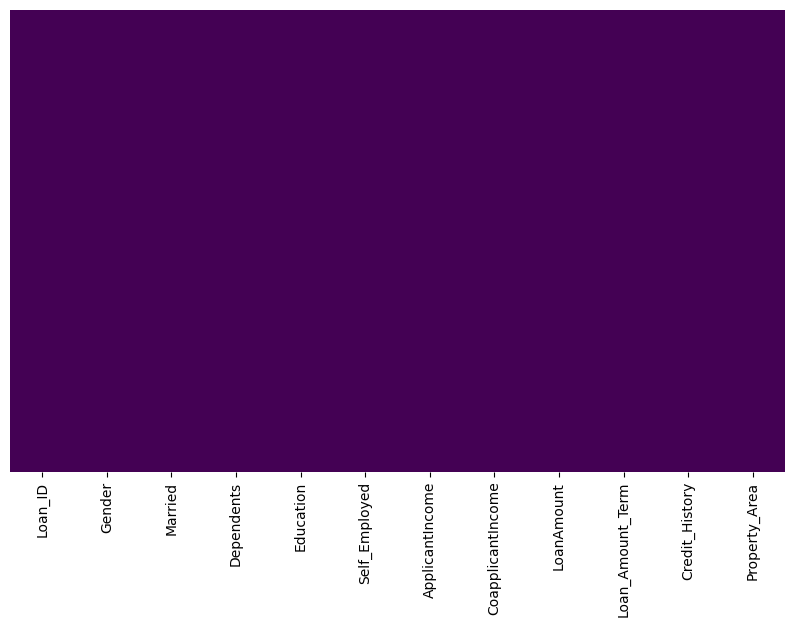

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

In [21]:
X_train.isna().sum()+X_test.isna().sum(), Y_train.isna().sum()+Y_test.isna().sum()

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64,
 Target    0
 dtype: int64)

# Build a Logistic Regression model Without imputation

In [22]:
df=pd.read_csv("data/heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression()

In [25]:
# model.fit(X,y)

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [27]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [28]:
df.shape

(4238, 16)

### Drop rows with missing values

In [29]:
df = df.dropna().reset_index()
df.isna().sum()


index              0
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Split dataset into X and y

In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


### Create a pipeline with model parameter

In [31]:
p = Pipeline([('lr',LogisticRegression())])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [32]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rskf.get_n_splits(X,y)
rskf

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [33]:
scores = cross_val_score(p,X,y,cv = rskf)

In [34]:
scores

array([0.84972678, 0.85245902, 0.84153005, 0.84699454, 0.84972678,
       0.84699454, 0.84657534, 0.85479452, 0.84657534, 0.84931507,
       0.84699454, 0.84699454, 0.85519126, 0.83606557, 0.84972678,
       0.84699454, 0.84383562, 0.85205479, 0.85205479, 0.84109589,
       0.84972678, 0.85245902, 0.85245902, 0.84699454, 0.84972678,
       0.8442623 , 0.85205479, 0.85205479, 0.84657534, 0.84383562])

### Print the Mean Accuracy and Standard Deviation from scores

In [35]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.004


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [37]:
df=pd.read_csv("data/heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [38]:
df.shape

(4238, 16)

In [39]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Create a SimpleImputer with mean strategy

In [40]:
si = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [41]:
lr = LogisticRegression()

### Create a pipeline with impute and model parameters

In [42]:
p = Pipeline([('si', si),('lr',lr)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [43]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# rskf.get_n_splits(X,y)
rskf

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [44]:
scores = cross_val_score(p,X,y,cv = rskf)

In [45]:
scores

array([0.8490566 , 0.85377358, 0.84669811, 0.8490566 , 0.84433962,
       0.84669811, 0.84669811, 0.8490566 , 0.84869976, 0.85106383,
       0.8490566 , 0.85141509, 0.85141509, 0.85613208, 0.84669811,
       0.8490566 , 0.84433962, 0.85141509, 0.8534279 , 0.85815603,
       0.85141509, 0.85141509, 0.8490566 , 0.84433962, 0.85141509,
       0.85141509, 0.8490566 , 0.85613208, 0.8534279 , 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [46]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.003


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

SimpleImputer with Mean Strategy

# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [48]:
si = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [49]:
r = RandomForestClassifier(max_depth=5)

### Create a pipeline

In [50]:
p = Pipeline([('si',si),('r',r)])

### Create RepeatedStratifiedKFold

In [51]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# rskf.get_n_splits(X,y)
# rskf

### Create Cross_val_score

In [52]:
scores = cross_val_score(p,X,y,cv = rskf)

### Print Mean Accuracy and Standard Deviation

In [53]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.848  | Std: 0.002


# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

In [55]:
algos = [LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC()] 
strats = ['mean','median','most_frequent','constant']


# Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [56]:
for i in strats:
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    p = make_pipeline(SimpleImputer(strategy=i),algos[2])
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    print(f"Mean Accuracy for {i} strategy: {round(np.mean(cross_val_score(p,X,y,cv = rskf)), 3)}  | Std: {round(np.std(cross_val_score(p,X,y,cv = rskf)), 3)}")
    

Mean Accuracy for mean strategy: 0.85  | Std: 0.005
Mean Accuracy for median strategy: 0.85  | Std: 0.005
Mean Accuracy for most_frequent strategy: 0.85  | Std: 0.007
Mean Accuracy for constant strategy: 0.85  | Std: 0.006


# Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [57]:
for i in algos:
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    p = make_pipeline(SimpleImputer(strategy=strats[0]),i)
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    print(f"Mean Accuracy for {i} model: {round(np.mean(cross_val_score(p,X,y,cv = rskf)), 3)}  | Std: {round(np.std(cross_val_score(p,X,y,cv = rskf)), 3)}")
    

Mean Accuracy for LogisticRegression() model: 0.849  | Std: 0.004
Mean Accuracy for KNeighborsClassifier() model: 0.834  | Std: 0.009
Mean Accuracy for RandomForestClassifier() model: 0.848  | Std: 0.006
Mean Accuracy for SVC() model: 0.848  | Std: 0.002


Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [58]:
for i in algos:
    for j in strats:
        X = df.iloc[:,:-1]
        y = df.iloc[:,-1]
        p = make_pipeline(SimpleImputer(strategy=j),i)
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
        print(f"Mean Accuracy for {i} model, {j} strats: {round(np.mean(cross_val_score(p,X,y,cv = rskf)), 3)}  | Std: {round(np.std(cross_val_score(p,X,y,cv = rskf)), 3)}")
    

Mean Accuracy for LogisticRegression() model, mean strats: 0.85  | Std: 0.004
Mean Accuracy for LogisticRegression() model, median strats: 0.849  | Std: 0.004
Mean Accuracy for LogisticRegression() model, most_frequent strats: 0.85  | Std: 0.004
Mean Accuracy for LogisticRegression() model, constant strats: 0.85  | Std: 0.005
Mean Accuracy for KNeighborsClassifier() model, mean strats: 0.837  | Std: 0.008
Mean Accuracy for KNeighborsClassifier() model, median strats: 0.836  | Std: 0.008
Mean Accuracy for KNeighborsClassifier() model, most_frequent strats: 0.835  | Std: 0.009
Mean Accuracy for KNeighborsClassifier() model, constant strats: 0.838  | Std: 0.009
Mean Accuracy for RandomForestClassifier() model, mean strats: 0.849  | Std: 0.006
Mean Accuracy for RandomForestClassifier() model, median strats: 0.849  | Std: 0.006
Mean Accuracy for RandomForestClassifier() model, most_frequent strats: 0.85  | Std: 0.006
Mean Accuracy for RandomForestClassifier() model, constant strats: 0.849  